In [41]:
import pandas as pd
url = 'https://raw.githubusercontent.com/htphuc2110/File-/main/Mastercard_stock_history.csv'
data = pd.read_csv(url)
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


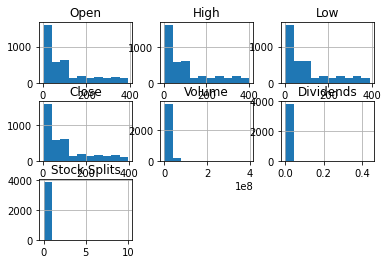

In [42]:
import seaborn as sns 
import matplotlib.pyplot as plt 
data.hist()
plt.show()

In [43]:
correlation = data.corr()

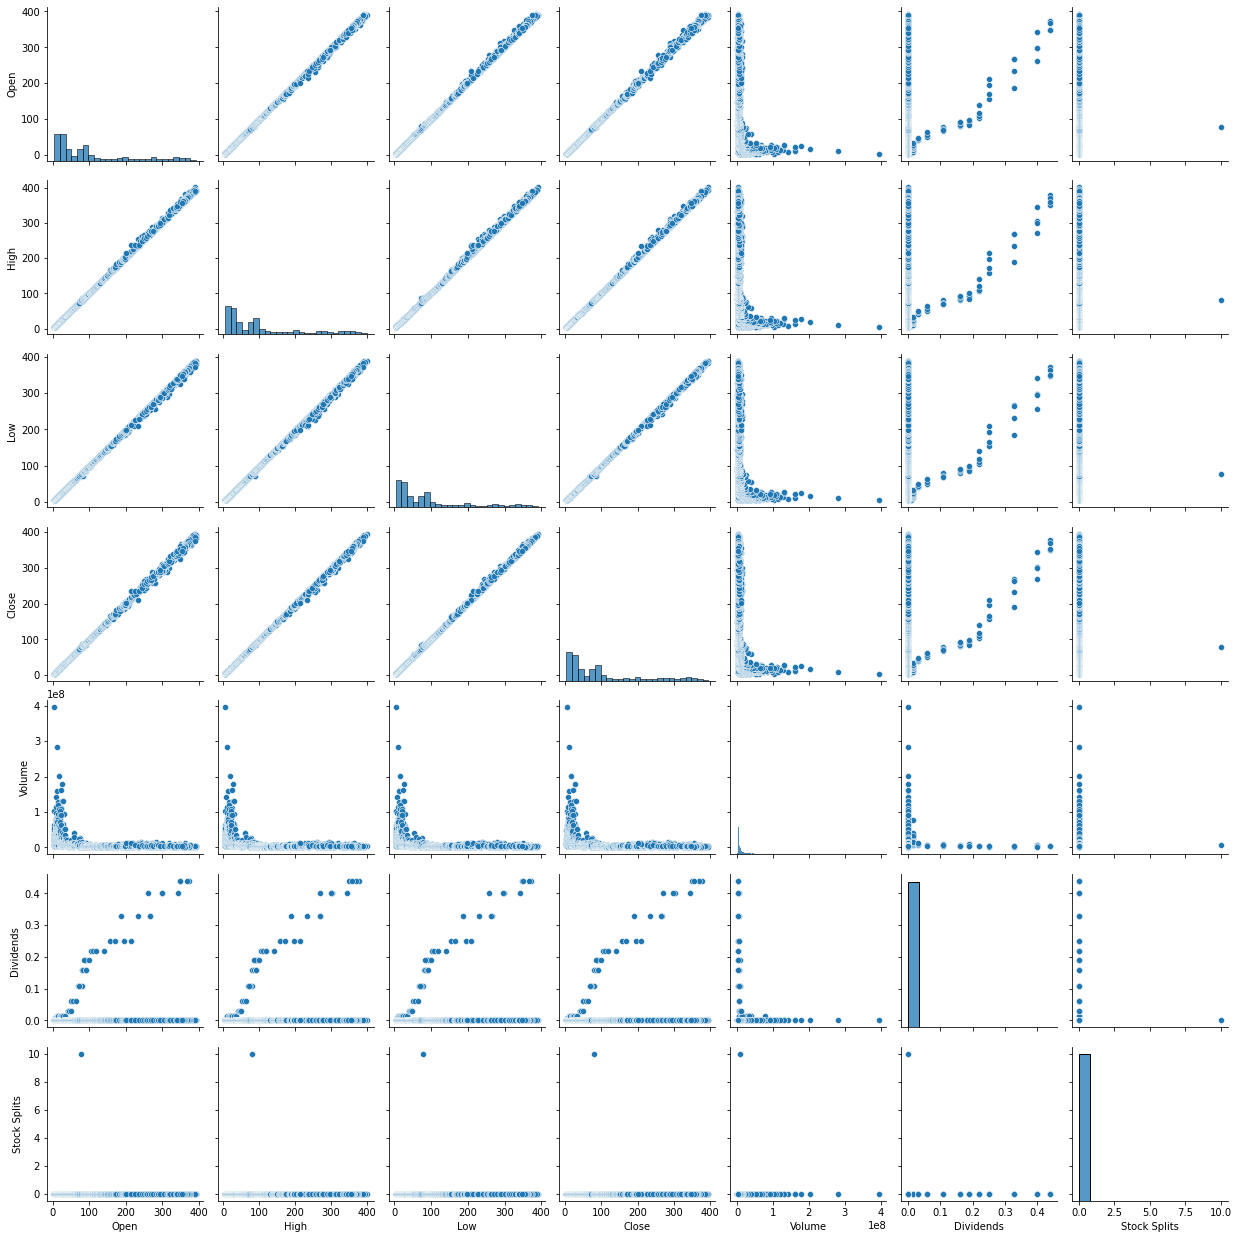

In [44]:
sns.pairplot(data)

<Axes: >

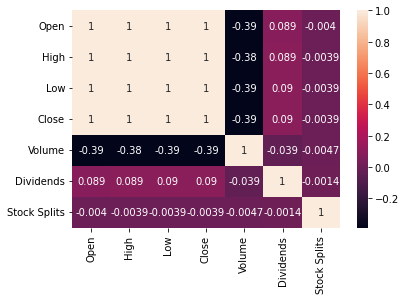

In [46]:
sns.heatmap(correlation, annot=True)

### ***Hồi quy Bậc 1***

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Dividends', ylabel='High'>

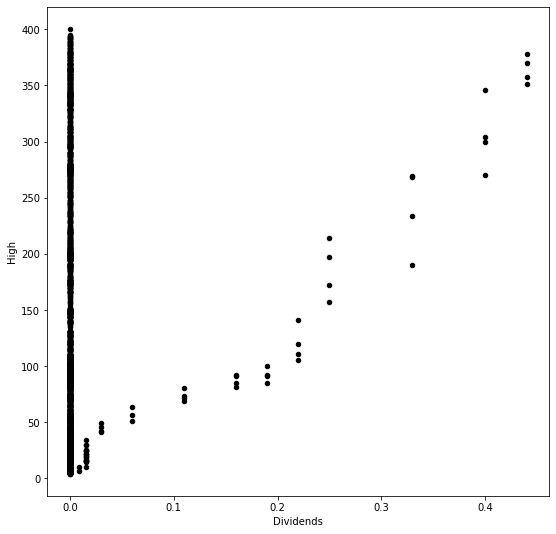

In [47]:
data.plot(kind='scatter',x='Dividends',y='High',figsize=(9,9),color='black')

In [48]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['Dividends']),y=data['High'])
print('Gia tri Intercept la: ',model.intercept_)
print('Gia tri Coeffient la: ',model.coef_)

Gia tri Intercept la:  105.09150325297499
Gia tri Coeffient la:  [371.20672846]


In [49]:
model.score(X=pd.DataFrame(data['Dividends']),y=data['High'])

0.007997472189206212

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


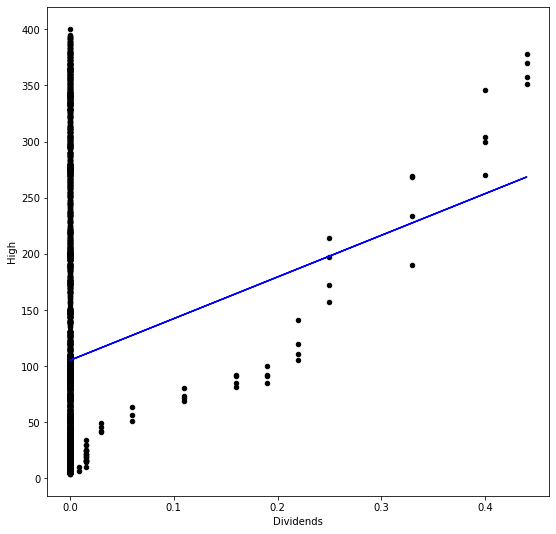

In [50]:
data.plot(kind='scatter',x='Dividends',y='High',figsize=(9,9),color='black')
y_pred = model.predict(X=pd.DataFrame(data['Dividends']))
plt.plot(data['Dividends'],y_pred,color='blue')

### ***Hồi quy bậc 2***

In [51]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Dividends'],data['Dividends']**2]).T
y = data['High']
model.fit(X,y)
print('He so Intercept la : ',model.intercept_)
print('He so coeffient la :',model.coef_)
print('Do chinh xac cua mo hinh :',model.score(X,y))

He so Intercept la :  105.44586473516767
He so coeffient la : [-585.93494686 2783.66568823]
Do chinh xac cua mo hinh : 0.012452430124897496


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


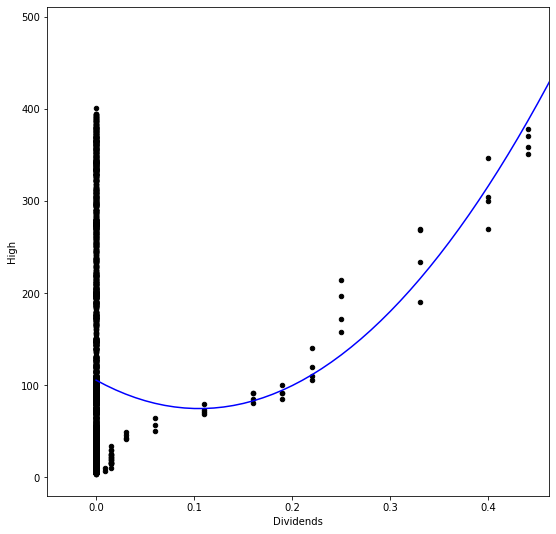

In [55]:
import numpy as np
range = np.arange(0.0,0.5,0.01)
X_range = pd.DataFrame([range,range**2]).T
y_pred  = model.predict(X_range)
data.plot(kind='scatter',x='Dividends',y='High',figsize=(9,9),color='black',xlim=(-0.05))
plt.plot(range, y_pred, color='blue')

### ***Hồi quy bậc 10***

In [56]:
model = linear_model.LinearRegression()
X = pd.DataFrame([data['Dividends'],data['Dividends']**2,data['Dividends']**3,data['Dividends']**4,data['Dividends']**5,data['Dividends']**6,data['Dividends']**7,data['Dividends']**8,data['Dividends']**9,data['Dividends']**10]).T
model.fit(X,y=data['High'])
print('He so Intercept la : ',model.intercept_)
print('He so coeffient la :',model.coef_)
print('Do chinh xac cua mo hinh :',model.score(X,y))

He so Intercept la :  105.90560891237061
He so coeffient la : [-1.61080424e+04  1.03848242e+06 -2.91040632e+07  4.38128448e+08
 -3.89073602e+09  2.13062692e+10 -7.26216627e+10  1.49845712e+11
 -1.71104413e+11  8.28948649e+10]
Do chinh xac cua mo hinh : 0.01603313090337255


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


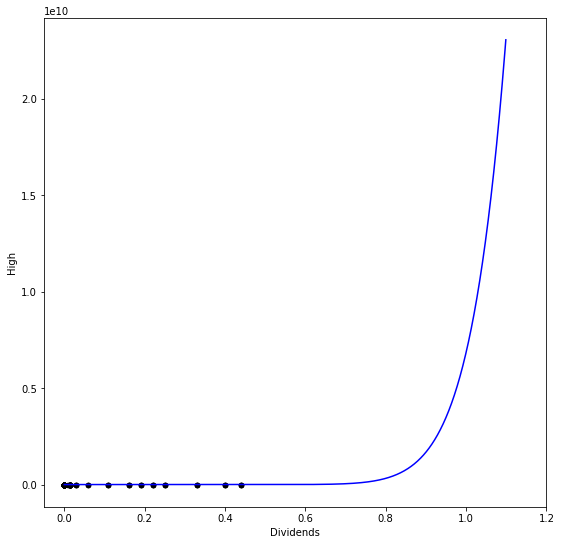

In [63]:
import numpy as np
range = np.arange(0.0,1.1,0.001)
X_range = pd.DataFrame([range,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T
y_pred  = model.predict(X_range)
data.plot(kind='scatter',x='Dividends',y='High',figsize=(9,9),color='black',xlim=(-0.05,1.2))
plt.plot(range, y_pred, color='blue')

In [65]:
model = linear_model.LinearRegression()
X=data.loc[:,['Dividends','Stock Splits']]
y=data['High']
model.fit(X,y)
print('He so Intercept la : ',model.intercept_)
print('He so coeffient la :',model.coef_)
print('Do chinh xac cua mo hinh :',model.score(X,y))

He so Intercept la :  105.09805216029864
He so coeffient la : [371.18408231  -2.51531461]
Do chinh xac cua mo hinh : 0.00801166341376025


In [67]:
model = linear_model.LinearRegression()
X=data.loc[:,['Dividends','Stock Splits','Volume']]
y=data['High']
model.fit(X,y)
print('He so Intercept la : ',model.intercept_)
print('He so coeffient la :',model.coef_)
print('Do chinh xac cua mo hinh :',model.score(X,y))

He so Intercept la :  133.94450423968792
He so coeffient la : [ 3.08628720e+02 -3.71836746e+00 -2.32888176e-06]
Do chinh xac cua mo hinh : 0.15363811627363122
